Sólo figuras aquí, todos los cálculos serios en el otro notebook please.

In [1]:
using PyPlot
using JLD
#acuerdate: no quieres svg interpolados
matplotlib[:rcParams][:"svg.image_noscale"]=false

false

In [2]:
function ListaPixelesdeLinea(x::Array, y::Array)
    #obtener una lista de pixeles/electrodos a lo largo de una linea con dos endpoints enteros.
    #Se ponen las dos coordenadas x en un arreglo y las dos y en otro-
    xuno, xdos=x[1], x[2]
    yuno, ydos=y[1],y[2]
    if abs(xuno-xdos)>= abs(yuno-ydos)

        longitud=abs(xuno-xdos)
        m=(ydos-yuno)/(xdos-xuno)
        xresult=collect(xuno:xdos) #asumimos que el xdos es el grande!
        yresult=zeros(Int, longitud+1)
        for j in 1:longitud+1
            yresult[j]=round(Int,yuno+(j-1)*m)
        end
    else
        
        longitud=abs(yuno-ydos)
        m=(xdos-xuno)/(ydos-yuno)
        yresult=collect(yuno:ydos) #asumimos que el ydos es el grande!
        xresult=zeros(Int, longitud+1)
    for j in 1:longitud+1
        xresult[j]=round(Int,xuno+(j-1)*m)
    end
   
    end
        
    return (xresult,yresult)
end

ListaPixelesdeLinea (generic function with 1 method)

In [5]:
LFPSaturado=load("LFPDesaturado_3R7.jld", "LFPSaturados")
LFPPlanchado=load("LFPDesaturado_3R7.jld", "LFPDenoized")

Dict{AbstractString,Array{T,N}} with 3 entries:
  "Trancazo_2" => 64x64x248 Array{Float64,3}:…
  "Trancazo_1" => 64x64x248 Array{Float64,3}:…
  "Trancazo_3" => 64x64x248 Array{Float64,3}:…

In [6]:
tmax=248

248

In [7]:
IntAbsLFP=zeros(64,64)
IntLFP=zeros(64,64)
for j=1:64,k=1:64
    IntAbsLFP[j,k]=sum(abs(LFPPlanchado["Trancazo_1"][j,k,:])
    +abs(LFPPlanchado["Trancazo_2"][j,k,:])
    +abs(LFPPlanchado["Trancazo_3"][j,k,:])
    )
    IntLFP[j,k]=sum(LFPPlanchado["Trancazo_1"][j,k,:]
    +LFPPlanchado["Trancazo_2"][j,k,:]
    +LFPPlanchado["Trancazo_3"][j,k,:]
    )  
end


LFPProm=LFPPlanchado["Trancazo_1"]+LFPPlanchado["Trancazo_2"]+LFPPlanchado["Trancazo_3"]
LFPProm/=3;

In [8]:
puntox=[36,36,36,36,36,36]
puntoy=[6,9,12,15,18,21]
puntol=["F","E", "D", "C", "B","A"];
#=
puntoy=puntoy+3

primax=[32, 32, 32, 32, 32, 32]
primay=[43,47,51,55,59,63]
primal=["F'","E'", "D'", "C'", "B'","A'"];
dobleprimax=[44,48,52,54,58,62]
dobleprimay=[38,36,34,32,30,28]
dobleprimal=["F''","E''", "D''", "C''", "B''","A''"];
=#
(muchasx,muchasy)=ListaPixelesdeLinea([36,36],[4,23])
length(muchasx)

20

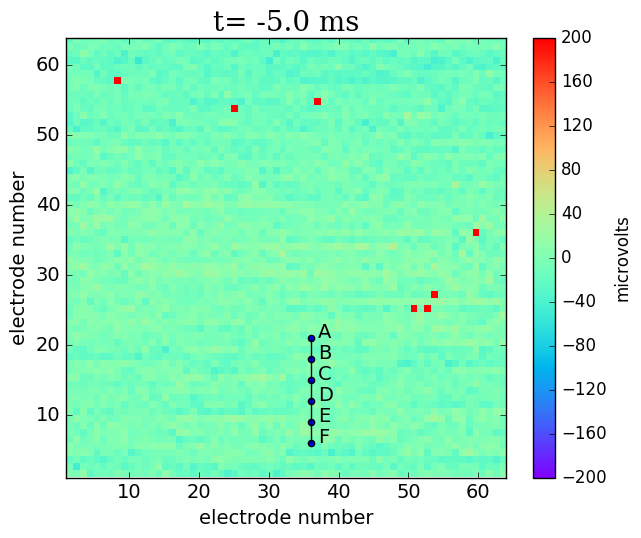

PyObject <matplotlib.text.Text object at 0x7fe9134d35f8>

In [9]:
ion()

cuadro=1
exdesaturado=LFPProm[:,:,cuadro];
figure(figsize=(7.0,5.5))
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20)
milisec=round((cuadro-36)/7.022,1)

title("t= $milisec ms", fontdict=font1)
limites=200
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)

for punto in 1:6
   annotate(puntol[punto], (puntox[punto], puntoy[punto]), xytext=(5,0), textcoords="offset points", fontsize=14)
   # annotate(primal[punto], (primax[punto], primay[punto]), xytext=(-18,-4), textcoords="offset points", fontsize=14)
   # annotate(dobleprimal[punto], (dobleprimax[punto], dobleprimay[punto]), xytext=(-18,-4), 
   # textcoords="offset points", fontsize=14)
end

imagen=imshow(exdesaturado, 
interpolation="nearest", cmap="rainbow", origin="lower", vmin=-limites, vmax=limites, extent=[1,64,1,64])
tick_params(axis="both", labelsize=14)

#scatter(muchasx,muchasy, marker="o", s=20, c="b")

scatter(puntox,puntoy, marker="o", s=20, c="b")


#scatter(primax,primay, marker="d", s=20, c="grey")
#scatter(dobleprimax,dobleprimay, marker="s", s=20, c="grey")


plot([36, 36], [6, 21], "k-")

cbx=colorbar(imagen, fraction=0.045) 
cbx[:set_label]("microvolts")
tick_params(axis="both", labelsize=14)

xlabel("electrode number", fontsize=14)
ylabel("electrode number", fontsize=14)

#savefig("LFP_Promedio_3R7-2-$cuadro.svg", dpi=90)

In [6]:
xizq=28
xder=42
ybajo=10
yalto=24

24

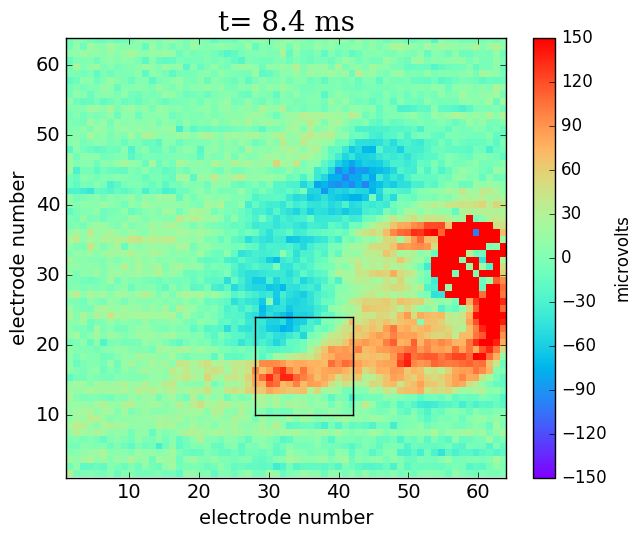

In [29]:
ion()

cuadro=95
exdesaturado=LFPProm[:,:,cuadro];
figure(figsize=(7.0,5.5))
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20)
milisec=round((cuadro-36)/7.022,1)

title("t= $milisec ms", fontdict=font1)
limites=150
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)


imagen=imshow(exdesaturado, 
interpolation="nearest", cmap="rainbow", origin="lower", vmin=-limites, vmax=limites, extent=[1,64,1,64])
tick_params(axis="both", labelsize=14)


plot([xizq, xder], [ybajo, ybajo], "k-")
plot([xizq, xder], [yalto, yalto], "k-")
plot([xizq, xizq], [ybajo, yalto], "k-")
plot([xder, xder], [ybajo, yalto], "k-")



cbx=colorbar(imagen, fraction=0.045) 
cbx[:set_label]("microvolts")
tick_params(axis="both", labelsize=14)

xlabel("electrode number", fontsize=14)
ylabel("electrode number", fontsize=14)

savefig("LFPConCuadro-$cuadro.svg",dpi=90)

In [20]:
SubDatos=getindex(LFPProm, ybajo:yalto,xizq:xder,1:tmax);

In [23]:
ioff()
for t=1:tmax
 figure(figsize=(7.0,5.5))
 imagen=imshow(SubDatos[:,:,t], origin="lower", interpolation="sinc", vmin=-200,vmax=200, extent=(28,42,10,24),cmap="plasma")
 cbx=colorbar(imagen, fraction=0.045) 
    savefig("EvocadoPeli-$t.png",dpi=92)
end

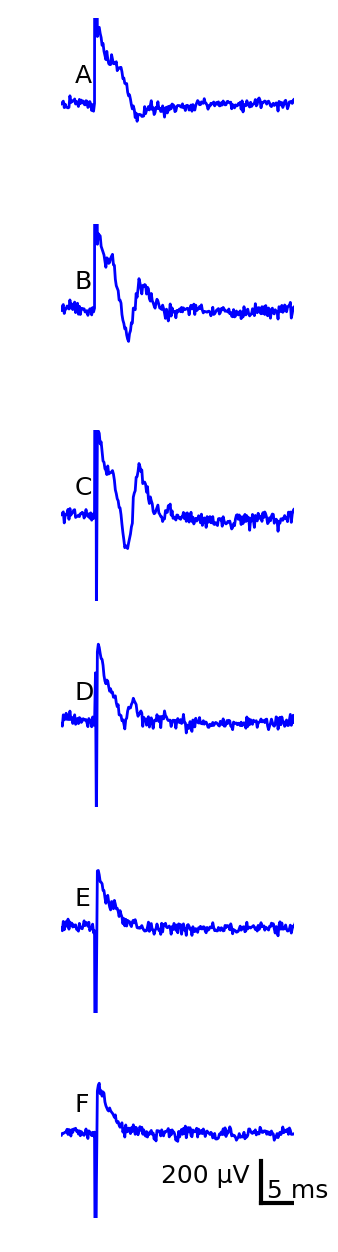

PyObject <matplotlib.text.Annotation object at 0x7fe90ac01780>

In [22]:
ion()
tiempo=1:tmax
t=700

farofa, lista=subplots(6, sharex=true, sharey=true, figsize=(3.0,6*2.5))

for j=1:6
    PyPlot.xlim(-5,30)
    PyPlot.ylim(-400,400)
    lista[j][:axis]("off")
    lista[j][:plot]((tiempo-36)/7.022,vec(LFPProm[puntoy[7-j],puntox[7-j],tiempo]),
    linewidth=2.0)
    lista[j][:annotate](puntol[7-j],xy=(-3,100), annotation_clip=false, fontsize=18)
end
lista[6][:plot]([25,30],[-330,-330], lw=3, c="k")
lista[6][:annotate]("5 ms", xy=(26,-300), fontsize=18)

lista[6][:plot]([25,25],[-330,-130], lw=3, c="k")
lista[6][:annotate]("200 µV", xy=(10,-230), fontsize=18)


#savefig("PotencialesEvocadosSeleccionados_3R7.svg", dpi=96)

In [23]:
tiempo=1:tmax
ioff()
t=700


farofa, lista=subplots(15,15, sharex=true, sharey=true, figsize=(15,6*2.5))

for j=1:15,k=1:15
    PyPlot.xlim(-5,30)
    PyPlot.ylim(-400,400)
    yys=vec(SubDatos[j,k,tiempo])
    xxs=(tiempo-34)/7.022
    rojo=maximum(yys[70:tmax])/400
    if rojo>1
        rojo=0.99
    end
    lista[16-j,k][:axis]("off")
    lista[16-j,k][:plot](xxs,yys, color=(rojo,0,0), lw=0.5)

end

lista[14,14][:plot]([25,30],[-330,-330], lw=1.5, c="k")
lista[14,14][:annotate]("5 ms", xy=(26,-300), fontsize=8)

lista[14,14][:plot]([25,25],[-330,-130], lw=1.5, c="k")
lista[14,14][:annotate]("200 µV", xy=(0,-230), fontsize=8)

savefig("MuchosTrazosSubMatrixView01.svg",dpi=92)


In [ ]:
arregloparacascadaLFP=zeros(length(muchasx),tmax);
for j in 1:length(muchasx)
    arregloparacascadaLFP[j,:]=LFPProm[muchasy[j],muchasx[j],:]
end

In [ ]:
figure(figsize=(12,6))
xlim(0,tmax+1)
limites=400
ylim(-limites,limites)

#exdesaturado=DatosCentrados["Trancazo_2"][:,:,140];
#imagen=imshow(exdesaturado, origin="lower", interpolation="nearest", cmap="rainbow", vmin=-limites,vmax=limites)
promedio=zeros(tmax)
k=0
xx=1:tmax
for j in 1:length(muchasx)
    yy=vec(arregloparacascadaLFP[j,:])-30*j+300
    promedio+=yy
    plot(xx,yy, c=(j/21,1-j/21,0))
    k+=1
end
#plot(1:tmax, promedio, c="black")   
#promedio=promedio/k
#plot(1:tmax, promedio, c="black")   


In [ ]:
limites=200
fag, gaf=subplots(figsize=(12,6))
#The density plot
gaf[:set_xlim](1,tmax)
gaf[:set_ylim](20.5,0)
imagen=gaf[:imshow](arregloparacascadaLFP, cmap="rainbow", 
vmin=-limites, vmax=limites, interpolation="sinc")
tiempoestampas=gaf[:axes][:get_xticks]()


gaf[:plot]([2,37.1],[21,21], "k-", lw=2)
gaf[:annotate]("5ms", (20.5,23))
gaf[:plot]([2,2],[21,2.73], "k-", lw=2)
gaf[:annotate]("1mm", (10,14))


#Some vertical lines
gaf[:plot]([36,36],[23,-2], c="0.2", ls="--", lw=2)
#gaf[:plot]([40,40],[23,-2], "r-", lw=4)
gaf[:annotate]("Stimulus", (37,22), fontsize=16)


#adjust aspcet ratioo
gaf[:axes][:set_aspect](3.7)
map!(x->round((x-36)/7.0224,1), tiempoestampas)
gaf[:axes][:set_xticklabels](tiempoestampas)
#gaf[:set_yticks]((puntoy-12)*1.25)
#gaf[:set_yticklabels](puntol)
gaf[:axis]("off")


#colorbar
cbx=colorbar(imagen, fraction=0.016)
cbx[:set_label]("µV")

#the traces over the plot
ga2 = gaf[:twinx]()
ga2[:set_ylim](-800,800)
ga2[:set_xlim](1,tmax)

ga2[:plot](1:tmax, vec(arregloparacascadaLFP[20,1:tmax])-400, "-", linewidth=0.6, color="0.3")
ga2[:plot]((1:tmax), vec(arregloparacascadaLFP[15,1:tmax])-250, "-", linewidth=0.6, color="0.3")
ga2[:plot](1:tmax, vec(arregloparacascadaLFP[11,1:tmax])-45, "-", linewidth=0.6 , color="0.3")
ga2[:plot]((1:tmax), vec(arregloparacascadaLFP[8,1:tmax])+160, "-", linewidth=0.6, color="0.3")
ga2[:plot](1:tmax, vec(arregloparacascadaLFP[4,1:tmax])+295, "-", linewidth=0.6, color="0.3")
ga2[:plot]((1:tmax), vec(arregloparacascadaLFP[1,1:tmax])+430, "-", linewidth=0.6,color="0.3")

ga2[:plot]([tmax-2,tmax-2],[-300,0], c="0.3", lw=2)
ga2[:annotate]("300 µV", (tmax-20,-120))
ga2[:axis]("off")


ga2[:annotate](puntol[1],xy=(-3,-400), annotation_clip=false, fontsize=18)
ga2[:annotate](puntol[2],xy=(-3,-250), annotation_clip=false, fontsize=18)
ga2[:annotate](puntol[3],xy=(-3,-45), annotation_clip=false, fontsize=18)
ga2[:annotate](puntol[4],xy=(-3,160), annotation_clip=false, fontsize=18)
ga2[:annotate](puntol[5],xy=(-3,295), annotation_clip=false, fontsize=18)
ga2[:annotate](puntol[6],xy=(-3,430), annotation_clip=false, fontsize=18)


savefig("LFP_espaciotiempo_3R7_promedio-rainbow.svg",dpi=96)


In [3]:
CSD=load("CSDEvocada.jld", "CSD")
CSDPlanchado=load("CSDEvocada.jld", "CSDPlanchada")

Dict{AbstractString,Array{T,N}} with 3 entries:
  "Trancazo_2" => 64x64x248 Array{Float64,3}:…
  "Trancazo_1" => 64x64x248 Array{Float64,3}:…
  "Trancazo_3" => 64x64x248 Array{Float64,3}:…

In [4]:
CSDPromedio=CSD["Trancazo_1"]+CSD["Trancazo_2"]+CSD["Trancazo_3"]
CSDPlanchadoPromedio=CSDPlanchado["Trancazo_1"]+CSDPlanchado["Trancazo_2"]+CSDPlanchado["Trancazo_3"];


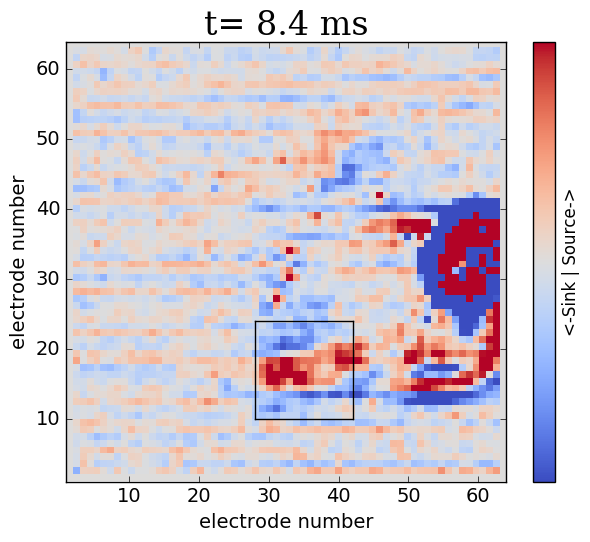

PyObject <matplotlib.text.Text object at 0x7fd244285b38>

In [7]:
ion()
cuadro=95
excsd=CSDPlanchadoPromedio[:,:,cuadro];

figure(figsize=(7.0,5.5))
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>24)
milisec=round((cuadro-36)/7.022,1)

title("t= $milisec ms", fontdict=font1)
limites=50
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)

imagen=imshow(excsd, 
interpolation="nearest", cmap="coolwarm", origin="lower", vmin=-limites, vmax=limites, extent=[1,64,1,64])
tick_params(axis="both", labelsize=14)


#scatter(primax,primay, marker="d", s=20, c="grey")
#scatter(dobleprimax,dobleprimay, marker="s", s=20, c="grey")


plot([xizq, xder], [ybajo, ybajo], "k-")
plot([xizq, xizq], [ybajo, yalto], "k-")
plot([xizq, xder], [yalto, yalto], "k-")
plot([xder, xder], [ybajo, yalto], "k-")



cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
cbx[:set_label]("<-Sink | Source->")
tick_params(axis="both", labelsize=14)

xlabel("electrode number", fontsize=14)
ylabel("electrode number", fontsize=14)

#savefig("CSD_3R7-promedio-$cuadro.svg", dpi=90)

In [9]:
CatenarioPositivo=load("Catenarios4AP-Promedio-3.jld", "CatenarioPositivo")
CatenarioNegativo=load("Catenarios4AP-Promedio-3.jld", "CatenarioNegativo");

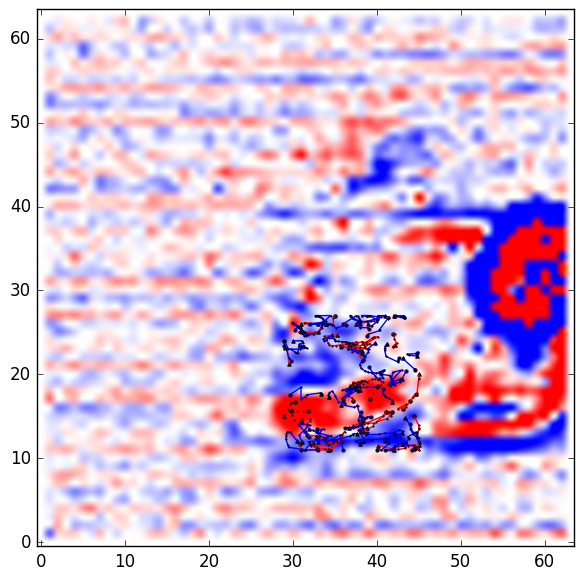

In [17]:
ion()
cuadro=95
excsd=CSDPlanchadoPromedio[:,:,cuadro];

figure(figsize=(6,6))
#axis("equal")
#tick_params(labelbottom="off", labelleft="off")
xlim(-0.50,63.5)
ylim(-0.5,63.5)
bolitasrojas=0
bolitasazules=0
minlargo=5
marcagor=5
muevemin=0.5
tight_layout()

guacafondo=imshow(excsd, cmap="bwr", interpolation="spline16", origin="lower", vmin=-40, vmax=40)

for p in CatenarioPositivo
    gordura=abs(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32,p[:,2]))
    longus,falsus=size(p)
    if mean(gordura)> marcagor && (desviax>muevemin || desviay>muevemin) && longus> minlargo 
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]+xizq
        yypos=p[:,2]+ybajo    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="r")
        #bolitasrojas=scatter(xxpos,yypos, s=gordura, 
        #edgecolors="none", color="r" )
        inicios=scatter(xxpos[1],yypos[1], s=marcagor, edgecolors="black", 
        linewidth=1,
        facecolor="red", marker="o" )
        finales=scatter(xxpos[end],yypos[end], s=marcagor, edgecolors="black", 
        linewidth=1,facecolor="red", marker="^", label="Final" )
      #  annotate(round(tiempos[1]*1000,1),  (xxpos[1], yypos[1]), fontsize=7, color="black")
       # annotate(round(tiempos[end]*1000,1), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end




for p in CatenarioNegativo
    gordura=abs(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32, p[:,2]))
    longus,falsus=size(p)
    if mean(gordura)>marcagor && (desviax>muevemin || desviay > muevemin) &&longus> minlargo
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]+xizq
        yypos=p[:,2]+ybajo    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="b")
        #bolitasazules=scatter(xxpos,yypos, s=gordura,
        #edgecolors="none", color="b")
        inicios=scatter(xxpos[1],yypos[1], s=marcagor, edgecolors="black", 
        linewidth=1,
        facecolor="blue", alpha=0.7, marker="o", label="Final" )
        finales=scatter(xxpos[end],yypos[end], s=marcagor, edgecolors="black", 
        linewidth=1,
        facecolor="blue", marker="^", label="Final" )
      #  annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
      #  annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end

#colorbar(bolitasrojas, fraction=0.046)
#colorbar(bolitasazules, fraction=0.052, ticks=[])

savefig("TrayectoriaEvocadaPromedio_3R7-Cuadro.svg", dpi=90)

In [27]:
SubDatos=getindex(CSDPlanchadoPromedio, 9:25,27:43,1:tmax);
ioff()

font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
"size"=>18)
for t=1:tmax
    
 figure(figsize=(7.0,5.5))
        
 milisec=round((t-35)/7.022,1)

 title("t= $milisec ms", fontdict=font1)
 imagen=imshow(SubDatos[:,:,t], origin="lower", interpolation="sinc", vmin=-50,vmax=50, extent=(27,43,9,25),cmap="coolwarm")
 cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
 cbx[:set_label]("<-Sink | Source->")

 savefig("CSDEvocadoPeli-$t.png",dpi=92)
end

In [ ]:
arregloparacascadaCSD=zeros(length(muchasx),tmax);
for j in 1:length(muchasx)
    arregloparacascadaCSD[j,:]=CSDPlanchadoPromedio[muchasx[j],muchasy[j],:]
end

In [ ]:
muchasy

In [ ]:
limites=50 #misma escala que arriba
fag, gaf=subplots(figsize=(12,6))
#The density plot
gaf[:set_xlim](1,tmax)
gaf[:set_ylim](20.5,0)
imagen=gaf[:imshow](arregloparacascadaCSD, cmap="coolwarm", interpolation="sinc",
vmin=-limites, vmax=limites)
tiempoestampas=gaf[:axes][:get_xticks]()


gaf[:plot]([2,37.1],[21,21], "k-", lw=2)
gaf[:annotate]("5ms", (20.5,23))
gaf[:plot]([2,2],[21,2.73], "k-", lw=2)
gaf[:annotate]("1mm", (10,14))


#Some vertical lines
gaf[:plot]([34,34],[23,-2], "b--", lw=4)

gaf[:plot]([tmax-7,tmax-7],[23,-2], "b--", lw=4)

gaf[:annotate]("0", (36,23))

#adjust aspcet ratioo
gaf[:axes][:set_aspect](3.7)

#gaf[:axis]("off")

#colorbar
cbx=colorbar(imagen, fraction=0.016, ticks=[])
cbx[:set_label]("Sink | Source")


#savefig("CSDPlanchado_espaciotiempo_3R7_2.svg", dpi=96)